# PCA

## Question a)

Perform a PCA on the monthly changes of the yield curve and report how much variance is explained by the first two principal components. Express your answer in percentage points and round to 2 decimal places.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
df = pd.read_csv('SwissGovYields.csv', index_col=[0])
df.head()

,2 years,3 years,4 years,5 years,7 years,10 years,20 years,30 years
2000 08,3.804,3.721,3.685,3.684,3.731,3.840,4.177,4.401
2000 09,3.615,3.619,3.654,3.702,3.807,3.954,4.284,4.449
2000 10,3.578,3.585,3.623,3.672,3.779,3.927,4.265,4.446
2000 11,3.614,3.576,3.568,3.583,3.649,3.771,4.115,4.325
2000 12,3.232,3.220,3.236,3.271,3.374,3.552,3.983,4.188


In [3]:
import numpy as np
from sklearn.decomposition import PCA

X = df.diff(1).iloc[1:].values / 100
pca = PCA(n_components=2)
pca.fit(X)
print("explained_variance_ratio\n", pca.explained_variance_ratio_) # sum=1
print("pca.singular_values\n", pca.singular_values_) # sqrt lambda
print("pca.components\n", pca.components_) # ndarray of shape (n_components=1, n_features)

explained_variance_ratio
 [0.79635841 0.14856501]
pca.singular_values
 [0.04616078 0.01993779]
pca.components
 [[-0.38268873 -0.4156309  -0.41243348 -0.39760151 -0.36566676 -0.32966306
  -0.2583806  -0.20847424]
 [ 0.39737812  0.34739055  0.20592899  0.06390356 -0.14971138 -0.33060588
  -0.51654571 -0.52572503]]


C:\Users\jvmh\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\jvmh\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#depreca

In [4]:
print(f"{sum(pca.explained_variance_ratio_) * 100:.2f}")

94.49


## Question b)
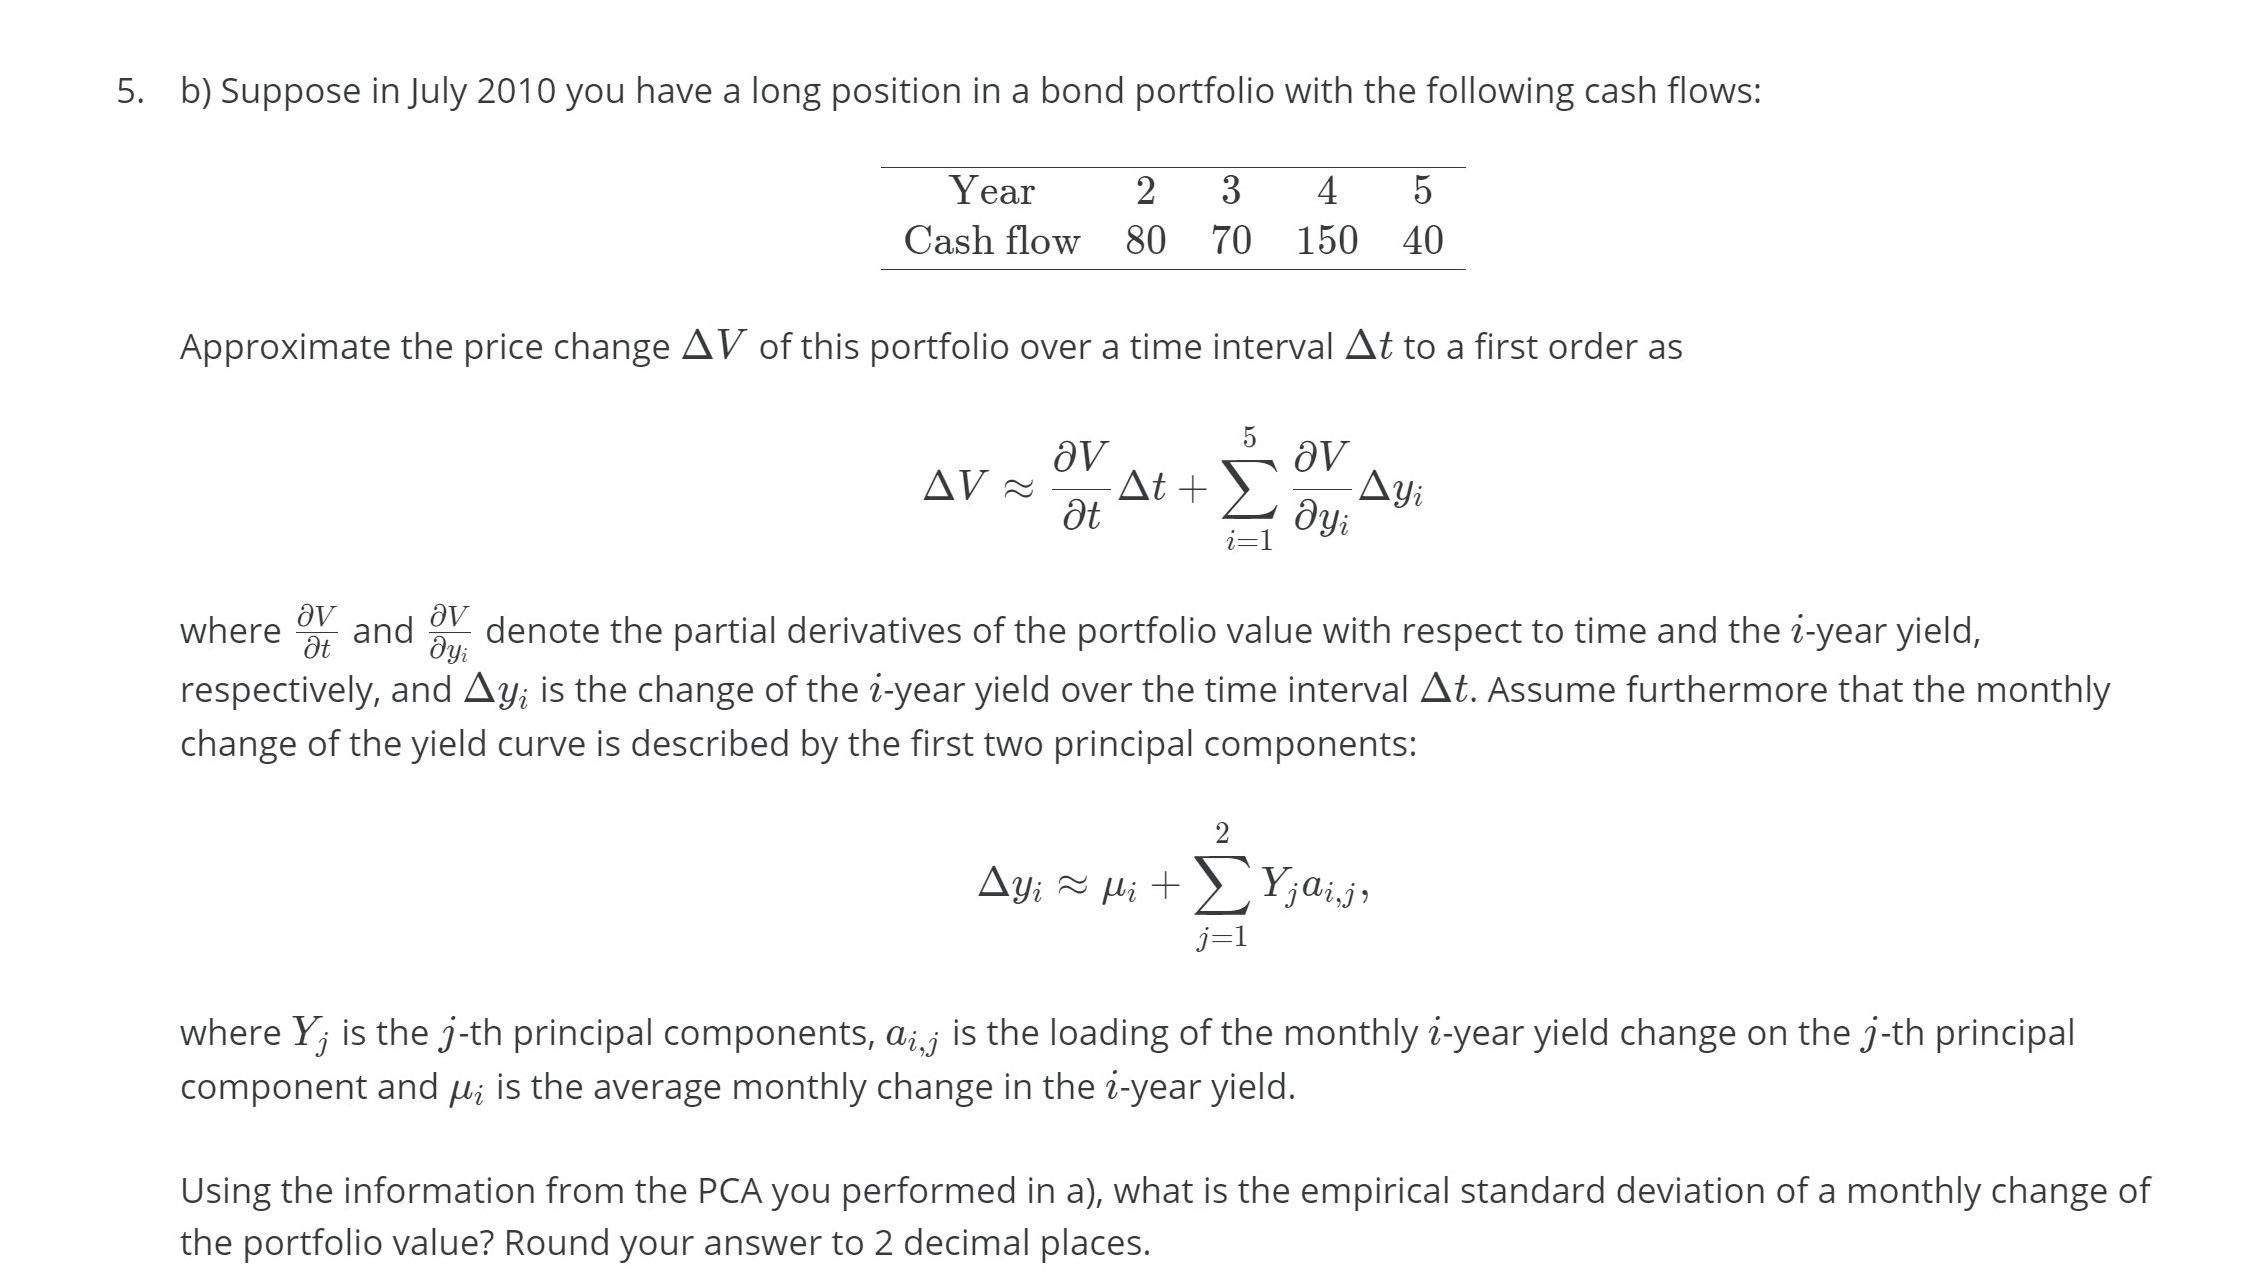

In [5]:
U = pca.components_
U

array([[-0.38268873, -0.4156309 , -0.41243348, -0.39760151, -0.36566676,
        -0.32966306, -0.2583806 , -0.20847424],
       [ 0.39737812,  0.34739055,  0.20592899,  0.06390356, -0.14971138,
        -0.33060588, -0.51654571, -0.52572503]])

In [6]:
dVdy = []
C = np.array([80, 70, 150, 40], dtype='float')
t_list = np.array([2, 3, 4, 5], dtype='float')
y_list = np.array([0.407, 0.522, 0.685, 0.863], dtype='float') / 100
dVdy = np.array([C[i] * np.e**(-y_list[i] * t_list[i]) * (-t_list[i]) for i in range(len(C))], dtype='float')
lambd =  pca.singular_values_ ** 2  / (len(df) - 1)

np.sqrt((dVdy @ U[0][:len(C)])**2 * lambd[0] + (dVdy @ U[1][:len(C)])**2 * lambd[1])

2.0216575337902984